In [78]:
import pandas as pd

In [90]:
def standardize(col):
    return (
        col
        .lower()
        .strip()
        .replace("'", "")
        .replace(" ", "_")
        .replace("-", "_")
        .replace(".", "_")
        .replace(",", "_")
        .replace("!", "_")
        .replace("!!", "_")
        .replace("\n", "_")
        .replace("__", "_")
    )

def get_data(file_name, dict_name, data_dict, extra=" by County"):
    for year in [2016, 2019]:
        data_dict[year] = pd.read_csv(f"data/{file_name} {year}{extra}.csv", skiprows=[1]).dropna()
        # data_dict[year].columns = [standardize(col) for col in data_dict[year].columns]
        data_dict[year]["NAME"] = data_dict[year]["NAME"].str.split(",")
        data_dict[year]["county"] = data_dict[year]["NAME"].apply(lambda x: x[0])
        data_dict[year]["state"] = data_dict[year]["NAME"].apply(lambda x: x[1])
        del data_dict[year]["NAME"]
        data_dict[year]["year"] = str(year)
        
        var_dict = pd.read_csv(f"data/{dict_name}.csv")
        var_dict["id"] = var_dict["id"].str.split("!!").apply(lambda x: x[-1]).apply(standardize)
        vd = {var_dict.iloc[i, 0]:var_dict.iloc[i, 1] for i in range(len(var_dict))}
        data_dict[year] = data_dict[year][["county", "state", "year"] + list(vd.keys())].rename(vd, axis=1)

In [91]:
find_col = lambda df, name: [col for col in df.columns if name in col]

In [92]:
soc_char = dict()

get_data("Social Characteristics", "Social Variable", soc_char, extra="")
    
soc_char = pd.concat([*soc_char.values()])
soc_char

,county,state,year,9th_to_12th_grade_no_diploma,associates_degree,bachelors_degree,graduate_or_professional_degree,high_school_graduate_(includes_equivalency),less_than_9th_grade,some_college_no_degree,average_household_size,married_couple_family,with_own_children_of_the_householder_under_18_years,male_householder_no_spouse/partner_present,female_householder_no_spouse/partner_present,foreign_born,native,females_15_years_and_over,males_15_years_and_over
0,LaSalle County,Illinois,2016,35.1,12.2,6.8,88.5,23.7,8.2,10.6,2.39,67.1,26.2,5.4,32.9,4001,95.9,23.7,35.7
1,McHenry County,Illinois,2016,26.5,23.4,10.3,92.6,23.8,4.3,8.5,2.76,72.4,33.4,4.5,27.6,28531,90.0,26.2,32.3
2,McLean County,Illinois,2016,25.1,27.4,16.5,96.9,19.5,2.0,8.3,2.52,62.1,28.0,4.3,37.9,13053,91.5,37.3,40.6
3,Macon County,Illinois,2016,34.0,13.0,8.6,89.5,24.4,7.1,9.4,2.34,61.1,24.8,4.3,38.9,1735,98.0,30.7,32.6
4,Madison County,Illinois,2016,28.8,16.5,9.9,92.5,26.8,6.0,10.6,2.47,63.3,26.2,4.7,36.7,7804,96.7,28.1,32.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Waukesha County,Wisconsin,2019,2.3,9.6,30.2,15.9,21.4,1.3,19.5,54044.00,58.1,21.8,14.8,22.0,4.8,95.2,170898.0,163943.0
825,Winnebago County,Wisconsin,2019,5.6,10.1,22.2,8.9,32.3,2.1,18.8,20364.00,45.0,17.3,20.9,26.3,3.9,96.1,71363.0,71700.0
826,Wood County,Wisconsin,2019,6.1,12.8,12.7,7.0,39.0,2.8,19.6,11415.00,46.9,14.8,19.3,26.9,1.7,98.3,30644.0,29354.0
827,Laramie County,Wyoming,2019,3.2,11.5,17.8,12.3,28.0,2.4,24.9,11845.00,50.9,18.2,20.7,21.4,3.4,96.6,39531.0,40789.0


In [93]:
demo_char = dict()

get_data("Demographic Data", "Demographic Variable", demo_char, extra="")
    
demo_char = pd.concat([*demo_char.values()])
demo_char

,county,state,year,american_indian_and_alaska_native,asian,black_or_african_american,native_hawaiian_and_other_pacific_islander,some_other_race,white,median_age_(years),sex_ratio_(males_per_100_females)
0,Autauga County,Alabama,2016,2.6,1.6,55049.0,0.4,0.1,1.5,37.8,5.8
1,Baldwin County,Alabama,2016,4.4,3.0,199510.0,0.4,0.1,1.3,42.3,5.7
2,Barbour County,Alabama,2016,4.3,3.4,26614.0,0.1,0.0,4.2,38.7,5.5
3,Bibb County,Alabama,2016,2.2,0.8,22572.0,0.1,0.0,0.0,40.2,5.1
4,Blount County,Alabama,2016,8.7,8.1,57704.0,0.2,0.1,0.9,40.8,6.1
...,...,...,...,...,...,...,...,...,...,...,...
3215,Vega Baja Municipio,Puerto Rico,2019,0.1,0.0,5.6,0.0,11.1,84.1,41.5,(X)
3216,Vieques Municipio,Puerto Rico,2019,0.1,0.2,8.6,0.0,36.5,55.8,47.0,(X)
3217,Villalba Municipio,Puerto Rico,2019,0.1,0.0,31.3,0.0,12.1,85.0,40.1,(X)
3218,Yabucoa Municipio,Puerto Rico,2019,0.1,0.0,79.6,0.0,1.8,19.6,42.9,(X)


In [94]:
econ_char = dict()

get_data("Economic Characteristics", "Economic Variable", econ_char, extra="")
    
econ_char = pd.concat([*econ_char.values()])
econ_char

,county,state,year,mean_travel_time_to_work_(minutes),unemployment_rate,per_capita_income_(dollars),mean_household_income_(dollars),median_household_income_(dollars),mean_cash_public_assistance_income_(dollars),mean_earnings_(dollars),mean_retirement_income_(dollars),mean_social_security_income_(dollars),mean_supplemental_security_income_(dollars)
0,LaSalle County,Illinois,2016,24.4,(X),27299,66763,57476,1486,67658,22120,19156,9293
1,McHenry County,Illinois,2016,32.4,(X),34654,94250,81063,5029,95409,29106,19516,11040
2,McLean County,Illinois,2016,18.3,(X),32521,82471,62156,1653,82280,32053,18604,12843
3,Macon County,Illinois,2016,17.3,(X),26729,62668,46198,2218,63336,25897,18112,9602
4,Madison County,Illinois,2016,24.7,(X),29450,73318,56035,1672,72804,25648,19067,9247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Ponce Municipio,Puerto Rico,2019,23.4,(X),11893,27761,15130,2341,36196,15233,13376,10055
836,San Juan Municipio,Puerto Rico,2019,27.0,(X),19742,43536,23005,1782,55559,18862,13612,8665
837,Toa Alta Municipio,Puerto Rico,2019,43.0,(X),15088,38502,28440,2899,44916,18778,13651,N
838,Toa Baja Municipio,Puerto Rico,2019,31.3,(X),13221,31892,23368,2304,35590,16976,14209,N


In [95]:
house_char = dict()

get_data("Housing Characteristics", "Housing Variable", house_char)
    
house_char = pd.concat([*house_char.values()])
house_char["average_household_size"] = house_char["average_household_size_of_owner_occupied_unit"]

house_char

,county,state,year,homeowner_vacancy_rate,average_household_size_of_owner_occupied_unit,average_household_size_of_renter_occupied_unit,median_rooms,moved_in_1979_and_earlier,moved_in_1980_to_1989,moved_in_1990_to_1999,...,10_to_19_units,1_unit_attached,1_unit_detached,2_units,20_or_more_units,3_or_4_units,5_to_9_units,boat_rv_van_etc_,mobile_home,average_household_size
0,LaSalle County,Illinois,2016,2.7,2.47,2.20,5.8,13.2,7.1,16.8,...,1.6,2.0,79.3,4.8,2.5,4.3,2.8,0.0,2.7,2.47
1,McHenry County,Illinois,2016,2.2,2.81,2.57,6.6,5.6,6.1,18.6,...,1.9,9.8,76.5,1.8,2.6,2.3,4.6,0.0,0.5,2.81
2,McLean County,Illinois,2016,0.7,2.67,2.23,5.7,5.1,4.7,10.0,...,8.4,4.7,62.1,3.1,7.5,3.6,6.0,0.0,4.6,2.67
3,Macon County,Illinois,2016,3.6,2.42,2.17,5.7,11.2,6.7,11.9,...,3.4,1.8,77.4,1.3,5.8,2.5,4.9,0.0,2.8,2.42
4,Madison County,Illinois,2016,3.3,2.56,2.22,5.7,8.9,7.7,15.1,...,2.7,2.3,78.7,3.0,2.7,4.9,2.9,0.0,2.7,2.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Ponce Municipio,Puerto Rico,2019,1.4,2.43,2.41,4.9,31.3,15.2,19.5,...,4.4,8.1,73.0,0.5,4.6,3.3,5.6,0.0,0.5,2.43
836,San Juan Municipio,Puerto Rico,2019,2.3,2.31,2.14,4.8,23.3,13.2,19.6,...,10.0,8.6,44.3,2.4,20.2,4.9,9.4,0.0,0.2,2.31
837,Toa Alta Municipio,Puerto Rico,2019,1.4,3.17,3.11,5.2,26.2,19.8,27.5,...,N,N,N,N,N,N,N,N,N,3.17
838,Toa Baja Municipio,Puerto Rico,2019,1.4,2.68,2.42,4.7,33.3,12.6,21.3,...,0.8,13.7,64.2,9.0,1.9,5.7,3.3,0.0,1.4,2.68


In [104]:
all_df = soc_char
for df in [demo_char, econ_char, house_char]:
    all_df = pd.merge(all_df, df, how="left", on=["county", "state", "year"])
    
all_df = all_df.drop(columns="average_household_size_x").rename({"average_household_size_y": "average_household_size"}, axis=1)

<AxesSubplot:>

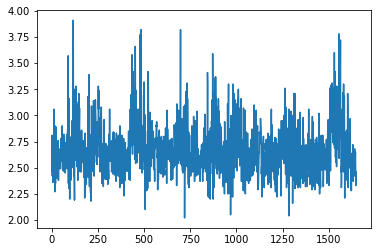

In [105]:
all_df["average_household_size"].plot()

In [106]:
all_df.to_csv("data/processed/all_chars.csv", index=False)